In [22]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
df = pd.read_excel('Dados/Dados mais Brutos.xlsx')

In [13]:
df.head()

,Cidade,Estado,Data,População residente,Densidade demográfica,Densidade100,Índice de Gini,Gini100,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Taxa de Acesso à Internet,Baixo,Médio,Alto,Percentual de estrangeiros,PIB per capita 2014,PIBpc100,Número de Agências,BANHAB,BANHAB100,Depósitos à vista - governo,Depósitos à vista - privado,Depósitos a prazo,Total Depósitos,DEPHAB,DEPHAB100,Camas em hospitais por milhares de habitantes,SCAMH100,Centros de saúde por milhares de habitantes,SCSAU100,Óbitos até 1 ano de idade por milhares de habitantes,SOBIT100,Óbitos por milhares de habitantes,SMORH100,Nascidos por milhares de habitantes,SNASC100,Hospitais por milhares de habitantes,SHOSP100,Médicos por milhares de habitantes,SMEDH100,Escolas primárias por dez mil habitantes,ESCPRI100,Escolas secundárias por dez mil habitantes,ESCSEC100,Escolas de ensino superior por dez mil habitantes,ESCTER100,% de pobres,TXPOB100,IDHM Longevidade,IDH100,Percentual de trabalhadores especializados,TRESP100,Percentual de Empregados em Ciência & Tecnologia,EMPCT100,Percentual de Empregados em Setores de Alta Tecnologia,EMPAT100,Razão de Gênero,"Valores de Importação por 10,000 habitantes",IMPHAB100,"Valores de Exportação por 10,000 habitantes",EXPHAB100,"Número de hotéis por 1,0000 habitantes",HOTHAB100,Percentual de empresas do setor primário em realação ao total,EMPPRIM100,Percentual de empresas do setor secundário em relação ao total,EMPSEC100,Percentual de empresas do setor terciário em relação ao total,EMPTER100,Percentual de empresas do setor público em relação ao total,EMPUB100,Percentual de empresas do setor privado em relação ao total,EMPRIV100,Percentual de trabalhadores do setor primário em relação ao total,TRABPRI100,Percentual de trabalhadores do setor secundário em relação ao total,TRABSEC100,Percentual de trabalhadores do setor terciário em relação ao total,TRABTER100,Média Salarial,MEDSAL100,Variação Salarial,Produtividade,PRODUT100,Taxa de desemprego dos jovens,DESJOV100,Taxa de desemprego,DESEMP100,Percentual de população total com renda,Proporção de estudantes de escolas primárias,Proporção de estudantes de escolas secundárias,Proporção de estudantes de faculdades,Número de livrarias por mil habitantes,LIVHAB100,"Número de Lojas(Comerciais, hotéis e restaurantes) por 1,000 habitantes",EMPCOM100,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes",TRACOM100,"Unidades de Atendimento da Administração Local por 10,000 habitantes",ATDADM100,"Número de ativos culturais e de lazer por 10,000 habitantes",ATVCUL100,Turnover,TURN100,Mediana salarial,MEDIANA100,Renda média domiciliar,RENDA100
0,Abadia de Goiás,Goiás,2015,6876,46.85,0.359705,0.42,52.50,43.27,50.86,5.88,72.46,33.98,16.06,67.23,22.68,10.09,0.00,23938.19,2.936863,0,0.000000,0.000000,0,0,0,0,0.000000e+00,0.000000,0.0,0.000000,0.6,9.090909,0.3,13.043478,2.9,7.090465,15.4,21.300138,0.00,0.000000,0.00,0.000000,10.18,9.010444,1.45,9.113765,0.00,0.000000,6.18,7.863596,0.83,93.258427,13.23,13.626532,0.37,1.239116,0.0,0.0,0.96,0.0,0.0,0.00,0.000000,0.00,0.000000,3.96,3.96,39.60,58.389855,56.44,56.44,0.50,0.50,99.50,99.50,9.69,9.69,33.56,37.313765,47.37,48.047469,1740.74,18.668494,20.46,2073776.12,2.832279,12.03,19.592834,5.03,12.047904,98.28,81.907895,18.092105,0.000000,0.15,0.563486,9.02,24.208266,60.21,10.295123,2.91,11.376075,2.91,10.931630,96.25,8.696006,1025.20,12.009296,1817.90,29.550845
1,Abadia dos Dourados,Minas Gerais,2015,6704,7.61,0.058428,0.47,58.75,34.99,55.83,9.17,63.80,56.24,10.98,79.31,13.50,7.19,0.00,27399.24,3.361483,1,0.149165,12.007757,46144,2765868,1432200,4244212,6.330865e+06,1.164808,3.1,3.444444,0.9,13.636364,0.3,13.043478,5.1,12.469438,9.6,13.278008,0.29,38.157895,0.15,1.530612,8.95,7.921756,1.49,9.365179,0.00,0.000000,7.94,10.103067,0.84,94.382022,8.75,9.012257,0.90,3.014066,0.0,0.0,1.03,0.0,0.0,0.00,0.000000,1.49,0.483798,3.85,3.85,19.93,29.386612,76.22,76.22,0.70,0.70,99

In [14]:
df.shape

(5565, 111)

In [17]:
df.columns

Index(['Cidade', 'Estado', 'Data', 'População residente',
       'Densidade demográfica', 'Densidade100', 'Índice de Gini', 'Gini100',
       'Porcentagem de Jovens', 'Porcentagem de Ativos',
       ...
       'Unidades de Atendimento da Administração Local por 10,000 habitantes',
       'ATDADM100',
       'Número de ativos culturais e de lazer por 10,000 habitantes',
       'ATVCUL100', 'Turnover', 'TURN100', 'Mediana salarial', 'MEDIANA100',
       'Renda média domiciliar', 'RENDA100'],
      dtype='object', length=111)

In [18]:
# Verificar dados ausentes
print("Dados ausentes por coluna:")
print(df.isnull().sum())

Dados ausentes por coluna:
Cidade                                                                             0
Estado                                                                             0
Data                                                                               0
População residente                                                                0
Densidade demográfica                                                              0
Densidade100                                                                       0
Índice de Gini                                                                     0
Gini100                                                                            0
Porcentagem de Jovens                                                              0
Porcentagem de Ativos                                                              0
Porcentagem de Idosos                                                              0
Taxa de Urbanização                   

In [21]:
print(df['Produtividade'].describe())

count    5.565000e+03
mean     2.766694e+06
std      3.120586e+06
min      6.289035e+05
25%      1.415220e+06
50%      2.053920e+06
75%      3.130039e+06
max      7.321935e+07
Name: Produtividade, dtype: float64


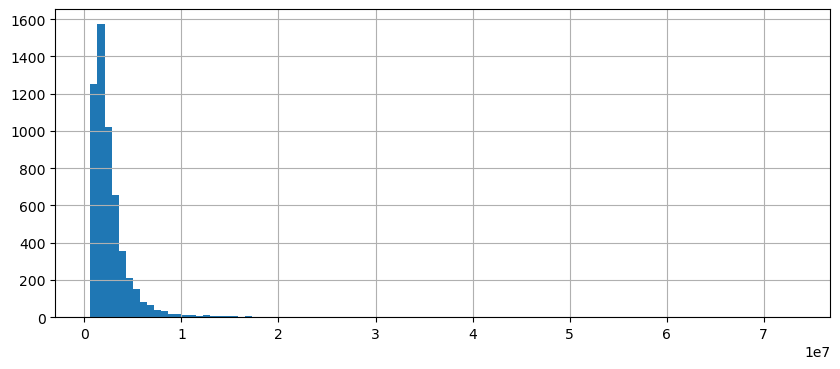

In [31]:
df['Produtividade'].hist(bins=100, figsize=(10,4))
plt.show()